# Wstęp do uczenia maszynowego
##  Projekt nr 1
#### Jakub Piwko, Malwina Wojewoda

# TODO:
Pogrubione jest to co zrobiłam, ale fajnie jakbyś to jakoś sprawdził

Sprawdziłem, i dodatkowo kursywą+pogrubienie oznaczam to co ja zrobiłem, też zachęcam do sprawdzenia  

* zrobić model z uwzględnieniem danych rasy i bez tego -  jak będziemy robić model to spróbować i z płcią i rasą i bez, 
* **podział na testowy biorąc pod uwagę zmienna celu -> DO SPRAWDZENIA** (SPOCZKO)
* **podzielić an decyle** (SPOCZKO)
* ***po wszystkim korelacje pirsona i spiermana żeby sprawdzić***
* **wcześniej też analiza korelacji - nie wiem co on ma na mysli ale coś napisałam** (SPOCZKO)
* zbadać korelacje przed zmianami i po, po powinno wzrosnąć,
* ***jeśli będą bardzo skorelowane to usunąć to która ma mniejszą predykcyjność (sprawdzając np. accuracy score lub gini, jakbym już wiedział co to jest), i też można grupowo przebadać gini i score i wyrzucić te kolumny których predykcyjność jest poniżej 5% :')***
* ***zamienić na WoE,***
* **encoding zrobic** (spoczko, ale zastanawiam się czy ta korelacja na dole -1 jest okej)

#### Pakiety

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split

### Dane i ich opis

In [2]:
census_df = pd.read_csv('census_income_dataset.csv')
census_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [3]:
pd.set_option('display.max_colwidth', -1)
descr = pd.read_csv('attributes_census_income.csv')
descr

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


#### Podział zbioru na treningowy i walidacyjny 

In [4]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbiory do walidacji
census_df_build, census_df_valid = sklearn.model_selection.train_test_split(
    census_df,
    test_size=0.30, random_state=100, stratify=census_df['income_level'])

census_df, census_df_test = sklearn.model_selection.train_test_split(
    census_df,
    test_size=0.30, random_state=100, stratify=census_df['income_level'])

In [5]:
# census_df["income_level"].value_counts()/np.shape(census_df)[0]

In [6]:
# census_df_test["income_level"].value_counts()/np.shape(census_df_test)[0]

## Ekspoloracja  i preprocessing danych

***Analiza braków danych***

In [7]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 9276 to 43599
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34189 non-null  int64  
 1   workclass       34189 non-null  object 
 2   fnlwgt          34189 non-null  float64
 3   education       34189 non-null  object 
 4   education_num   34189 non-null  int64  
 5   marital_status  34189 non-null  object 
 6   occupation      34189 non-null  object 
 7   relationship    34189 non-null  object 
 8   race            34189 non-null  object 
 9   sex             34189 non-null  object 
 10  capital_gain    34189 non-null  float64
 11  capital_loss    34189 non-null  float64
 12  hours_per_week  34189 non-null  float64
 13  native_country  34189 non-null  object 
 14  income_level    34189 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 4.2+ MB


W ramce danych nie wystąpują wartości None/Null. Z opisu ramki wiemy, że takowe braki, jeśli występują, są zakodowane odpowiednimi wartościami w kolumnach:  **?** dla danych nominalnych oraz **-100000** dla numerycznych. Sprawdźmy, ile rekordów z takimi wartościami występują w ramce.

In [8]:
census_df[census_df == -100000].count()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [9]:
census_df[census_df == "?"].count()

age               0   
workclass         1976
fnlwgt            0   
education         0   
education_num     0   
marital_status    0   
occupation        1984
relationship      0   
race              0   
sex               0   
capital_gain      0   
capital_loss      0   
hours_per_week    0   
native_country    630 
income_level      0   
dtype: int64

Okazuje się, że mamy braki w kolumnach `workclass`, `occupation` i `workclass`. Z czego dwie pierwsze kolumny w oczywisty sposób są powiązane, bo brak zawodu może automatycznie oznaczać brak klasy roboczej. Wartościami "?" stanowią klasę zmiennej kategorycznej i nie ma sensu tego zmieniać w inny sposób.

##### Średnia, wartości minimalne itd. 
Warto sprawdzić jaka jest średnia, odchylenie standardowe, wartość minimalna, maksymalna oraz kwartyle danych w poszczególnych kolumnach.

In [10]:
census_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,34189.000000,3.418900e+04,34189.000000,34189.000000,34189.000000,34189.000000
mean,38.623212,1.896649e+05,10.075200,1073.168300,88.376671,40.393782
std,13.707785,1.049949e+05,2.576816,7430.883371,405.811958,12.389336
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177670e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781370e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370440e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Już dzięki temu zestawieniu możemy powiedzieć coś o danych. Można stwierdzić, że dużo osób pracuje 40 godzin tygodniowo. Porównując średnie z wartościami minimalnymi i maskymalnymi dla kolumny `capital_gain` i `capital_loss` można stwierdzić, że wartości są bardzo rozchwiane i występują obserwacje odstające. Przyjrzyjmy sie histogramom. 

***Rozkłady zmiennych***


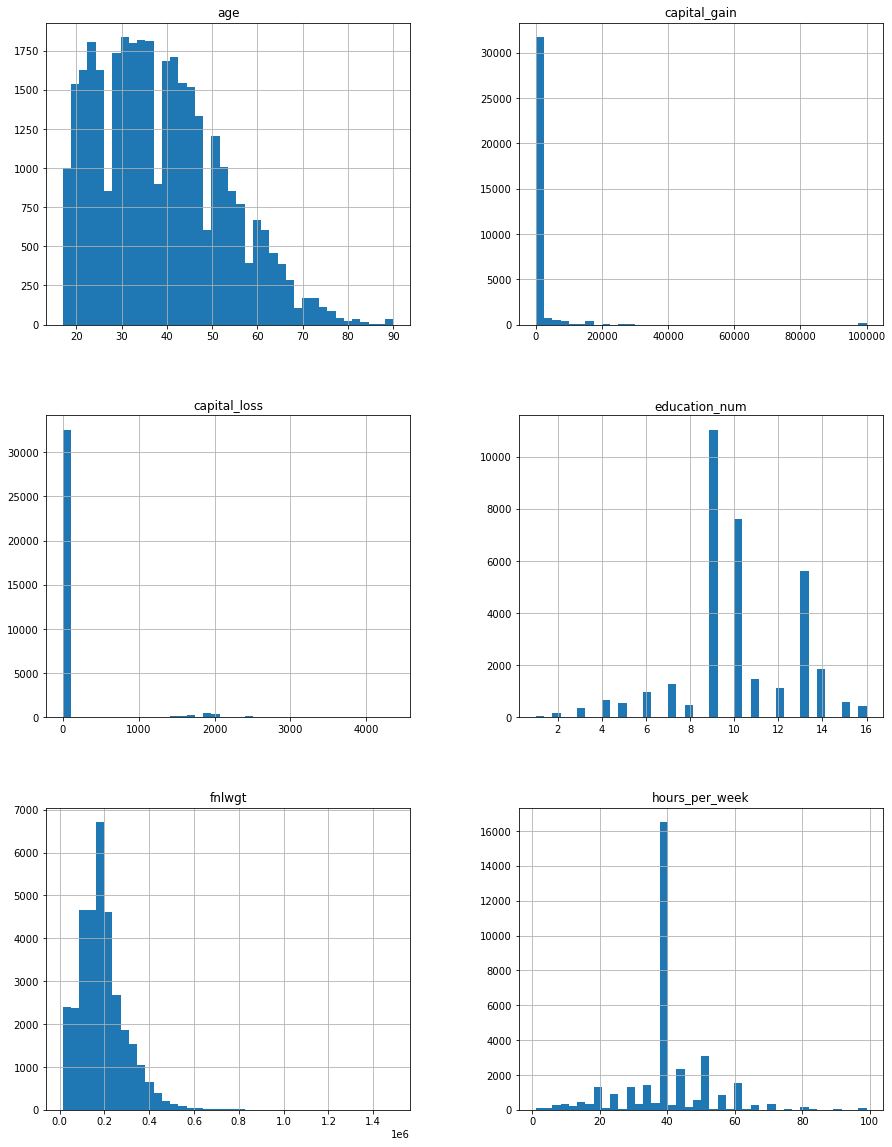

In [11]:
census_df.hist(figsize=(15, 20), bins=40)
plt.show()

Wspomniane wcześniej wnioski się potwirerdzają. Najwięcej osób pracuje 40 godzin tygodniowo, choć znajdują się osobu pracujące powyżej 80. Kolumny `capital_gain` i `capital_loss` wyglądają niekorzytsnie, gdyż mają przeważającą liczbę obserwacji zerowych. Wiek ma dosyć regularny rozkład, ale bardziej skośny prawostronnie, czyli w stronę osób młodszych. Wydaje się też, że dane zostały ucięte na wieku 90 lat. Jak wynika z opisu, kolumna `fnlwgt` jest parametrem, który ma oddawać wagę danego rekordu. Oznacza to więc, że nie będzie miała znaczenia dla oceny zarobków i można ją usunąć. Z kolei zmienna `education_num` wydaje się być zmienną kategoryczną. 

In [12]:
census_df.drop("fnlwgt", axis=1, inplace=True)

In [13]:
census_df[['education', 'education_num', 'age']].groupby(['education', 'education_num']).size().reset_index(name='counts').sort_values(by = "education_num")

,education,education_num,counts
13,Preschool,1,58
3,1st-4th,2,176
4,5th-6th,3,365
5,7th-8th,4,670
6,9th,5,546
0,10th,6,951
1,11th,7,1282
2,12th,8,453
11,HS-grad,9,11042
15,Some-college,10,7600


Z zsumowania rekordów zawierających unikalne pary `education` + `education_num` wynika, że ta druga kolumna jest tylko numerycznym zakodowaniem kolumny opisującej osiągnięty etap edukacji z zachowaniem porządku, zatem kolumna `education` nie będzie niezbędna w dalszej predykcji, dlatego możemy ją usunąć.

In [14]:
census_df.drop("education", axis=1, inplace=True)

Zamiana wartości ostatniej kolumny:
* z <=50K na 0
* z >50K na 1

ponieważ łatwiej pracuje się ze zmiennymi numerycznymi

In [15]:
census_df['income_level'] = census_df['income_level'].replace(['<=50K','>50K'],[0, 1])

##### Korelacje

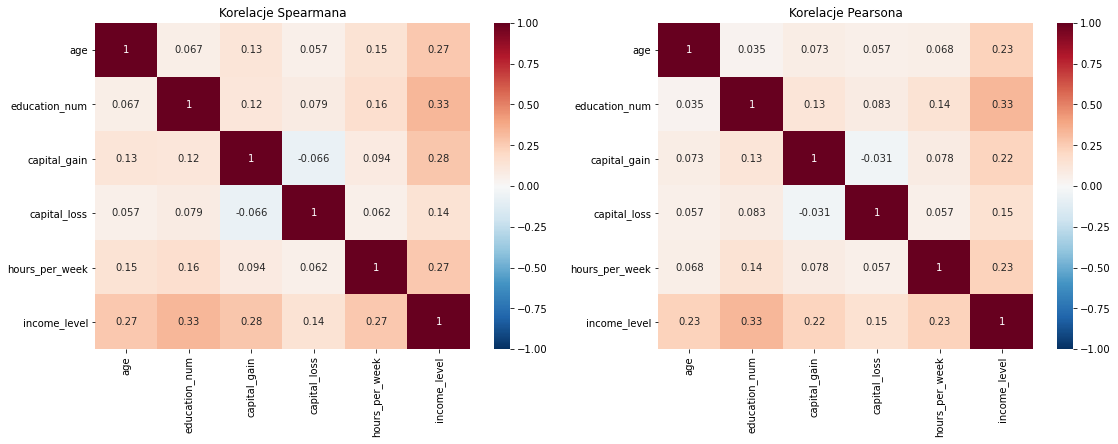

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
heatmap = sns.heatmap(census_df.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax1)
heatmap = sns.heatmap(census_df.corr(method = 'pearson'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax2)
ax1.set_title("Korelacje Spearmana")
ax2.set_title("Korelacje Pearsona")
fig.set_size_inches(18.5, 6)
plt.show()

Interesuje nas jak zmienne korelują ze zmienną `income_level`, ponieważ właśnie ją będziemy przewidywać. Widać, że wszystkie korelują z nią dodatnio. 

Zarówno dla korelacji Spearmana, jak i Pearsona widać, że zmienne korelują ze sobą dość słabo. Najsilniejsza widać między `education_num` a `income_level`, co wskazuje na to, że ta zmienna ma największy wpływ na naszą zmienną przewidywaną. 

Z analizy korelacji Spearmana widać, że istnieje także dośc słaba korelacja liniowa między `income_level` a wiekiem, zyskiem kapitałowym oraz czasem pracy w ciągu tygodnia. 

Pozostałe zmienne korelują między sobą bardzo słabo. 

In [17]:
census_df['income_level'].value_counts()

0    26008
1    8181 
Name: income_level, dtype: int64

Dodatkowo warto wiedzieć, że znacznie mniej osób zarabia powyżej progu 50K$. Teraz przyjrzyjmy sie rozkładom zmiennych typowo ciągłych z uwzględnieniem poziomu zarobków.

***Wiek***

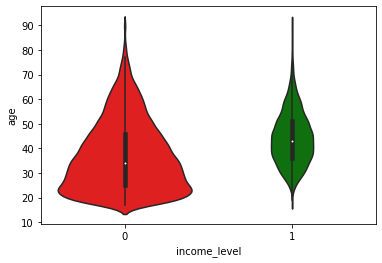

In [18]:
sns.violinplot(y = census_df['age'], x = census_df['income_level'], palette=["red", "green"], scale = "count")
plt.show()

Z rozkładu zmiennej `age` z uwzględnieniem podziału na poziom zarobków, można stwierdzić, że wśród osobów zarabiających lepiej, rozkład przesuwa się w stronę osób starszych.

Podzielmy tę zmienną na kategorie po decylach, oznaczając każdą kategorię jako numer oznaczający, w którym decylu się znalazła dana wartość.

In [19]:
tmp = pd.qcut(census_df['age'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
tmp[tmp.isna()] #sprawdzenie czy w ten sposób nie powstaną jakieś braki danych

Series([], Name: age, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10])

In [20]:
census_df['age'] = pd.qcut(census_df['age'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

***Przepracowane godziny w tygodniu***

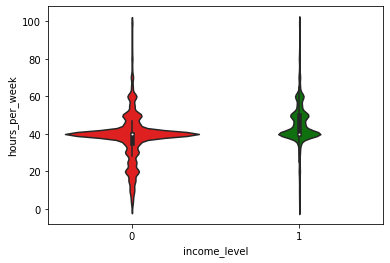

In [21]:
sns.violinplot(y = census_df['hours_per_week'], x = census_df['income_level'], palette = ['red', 'green'], scale = "count")

Dzięki zachowaniu skali ilości na wykresach można zauważyć tendecję, że osoby które pracują więcej, zarabiają lepiej. Świadczy o tym skupienie prawie wszystkich obserwacji powyżej poziomu 35h dla poziomu 1, podczas, gdy dla poziomu 0 widać duży peak w okolicach 40, ale dużą liczbę obserwacji poniżej tej wartości. Tę zmienną również możemy zmienić na kategoryczną, przy czym nie sprawdzi się tu dzielenie nawet na tercyle, ponieważ wartości w okolicahc 40 jest tak dużo. Zatem propunujemy następujący podział:
* *1* --- 0-35 godzin
* *2* --- 36-45 godzin
* *3* --- 46-inf godzin

In [22]:
tmp = pd.cut(census_df['hours_per_week'], bins=[0, 35, 45, np.inf], labels=[1, 2, 3])
tmp[tmp.isna()] #sprawdzenie czy w ten sposób nie powstaną jakieś braki danych

Series([], Name: hours_per_week, dtype: category
Categories (3, int64): [1 < 2 < 3])

In [23]:
census_df['hours_per_week'] = pd.cut(census_df['hours_per_week'], bins=[0, 35, 45, np.inf], labels=[1, 2, 3])

##### Zyski i straty kapitałowe
Jako, że zmienne `capital_gain` i `capital_loss` także są typowo ciągłe, żeby uwzględnić ich rozkłady pozbędziemy się najpierw obserwacji, dla których wartości powyższych kolumn są zerowe, ponieważ wartości tych jest bardzo dużo.

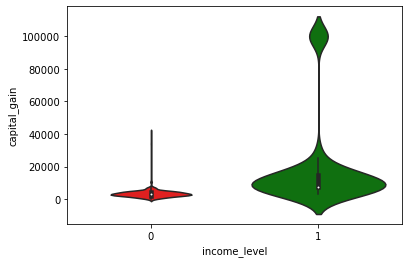

In [24]:
df = census_df[census_df['capital_gain'] > 0]
sns.violinplot(y = df['capital_gain'], x = df['income_level'], palette = ['red', 'green'], scale = "count")
plt.show()

Zobaczmy jeszcze jak to dokładniej wygląda na histogramach:

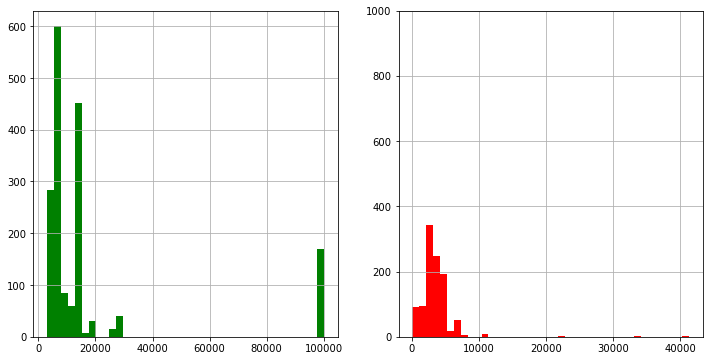

In [25]:
tmp = census_df.loc[(census_df['capital_gain']>0) & (census_df['income_level']==1)]
tmp2 = census_df.loc[(census_df['capital_gain']>0) & (census_df['income_level']==0)]

fig, axes = plt.subplots(1, 2)
tmp['capital_gain'].hist(bins = 40, figsize = (12,6), ax=axes[0], color = 'green')
tmp2['capital_gain'].hist(bins = 40, figsize = (12,6), ax=axes[1], color = 'red')
plt.ylim((0,1000))
plt.show()

Widać, że w przypadku zmiennej `capital_gain` więcej osób, które mają przychód >50 000 \\$ osiąga zysk na poziomie 0-20 000\\$. Wydaje się też, że dane zostały ucięte dla wartości powyżej 100 000\\$. Dla osób w grupie o niższych przychodach widać, że wartości zysku nie przekraczają wartości 50 000\\$, ponieważ to wlicza się do ogólnego przychodu. Aby to było możliwe ktoś musiałby usyskać dużą staratę kapitałową, ponieważ przychód liczony jest jako *capital_gain* - *capital_loss* + salary

Tę kolumnę również zmienimy na zmienną kategoryczną, przy czym zauważyliśmy, że występuje bardzo dużo zerowych wartości, więc warto je zgupować jako osobną kategorię, oznaczoną jako *0*. Pozostałe wiersze zostaną podzielone po kwintylach. 

In [26]:
tmp = census_df.loc[(census_df['capital_gain']>0)]
res, bins = pd.qcut(tmp['capital_gain'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
bins.tolist()

[114.0, 3103.0, 5013.0, 7688.0, 15024.0, 99999.0]

In [27]:
tmp = pd.cut(census_df['capital_gain'], bins=[-1, 114.0, 3103.0, 5013.0, 7688.0, 15024.0, np.inf], 
             labels=[0, 1, 2, 3, 4, 5])
tmp[tmp.isna()] #sprawdzenie czy w ten sposób nie powstaną jakieś braki danych

Series([], Name: capital_gain, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5])

In [28]:
census_df['capital_gain'] = pd.cut(census_df['capital_gain'], bins=[-1, 114.0, 3103.0, 5013.0, 7688.0, 15024.0, np.inf], 
             labels=[0, 1, 2, 3, 4, 5])

`capital_loss`

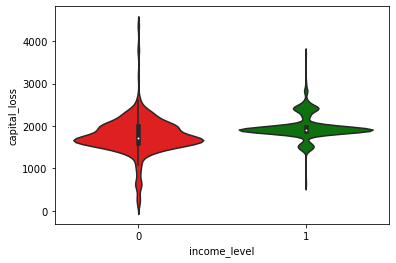

In [29]:
df = census_df[census_df['capital_loss'] > 0]
sns.violinplot(y = df['capital_loss'], x = df['income_level'], palette = ['red', 'green'], scale = "count")
plt.show()

Zobaczmy jeszcze jak to dokładniej wygląda na histogramach:

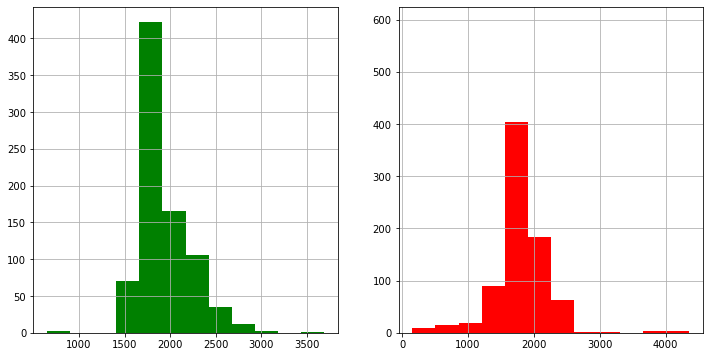

In [30]:
tmp = census_df.loc[(census_df['capital_loss']>0) & (census_df['income_level']==1)]
tmp2 = census_df.loc[(census_df['capital_loss']>0) & (census_df['income_level']==0)]

fig, axes = plt.subplots(1, 2)
tmp['capital_loss'].hist(bins = 12, figsize = (12,6), ax=axes[0], color = 'green')
tmp2['capital_loss'].hist(bins = 12, figsize = (12,6), ax=axes[1], color = 'red')
plt.ylim((0,625))
plt.show()

`capital_loss` w przypadku obu grup osób nie przekracza 5000\\$ i najwięcej osób (oprócz tych dla których odnotowano zerową wartość tej zmiennej) osiąga straty kapitałowe w okolicy 2000\\$. Rozkłady są bardzo podobne, jednak dla osób, które odnotowały mniejszy dochód bardziej przesunięte w stronę mniejszych wartości, a dla drugiej grupy w stronę większych wartości.

Tę zmienną również przekształcimy na kategoryczną, analogicznie jak `capital_gain`, czyli zerowe wartości jako osobną kategorię, oznaczoną jako *0*, a pozostałe wartości po kwintylach. 

In [31]:
tmp = census_df.loc[(census_df['capital_loss']>0)]
res, bins = pd.qcut(tmp['capital_loss'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
bins.tolist()

[155.0, 1617.0, 1876.0, 1902.0, 2002.0, 4356.0]

In [32]:
tmp = pd.cut(census_df['capital_loss'], bins=[-1, 155.0, 1619.2, 1887.0, 1902.0, 2002.0, np.inf], 
             labels=[0, 1, 2, 3, 4, 5])
tmp[tmp.isna()] #sprawdzenie czy w ten sposób nie powstaną jakieś braki danych

Series([], Name: capital_loss, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5])

In [33]:
census_df['capital_loss'] = pd.cut(census_df['capital_loss'], bins=[-1, 155.0, 1619.2, 1887.0, 1902.0, 2002.0, np.inf], 
             labels=[0, 1, 2, 3, 4, 5])

***Kraj pochodzenia***

Teraz przyjrzymy się zależnościom między zmiennymi kategorycznymi i zmienną poziomującą zarobki

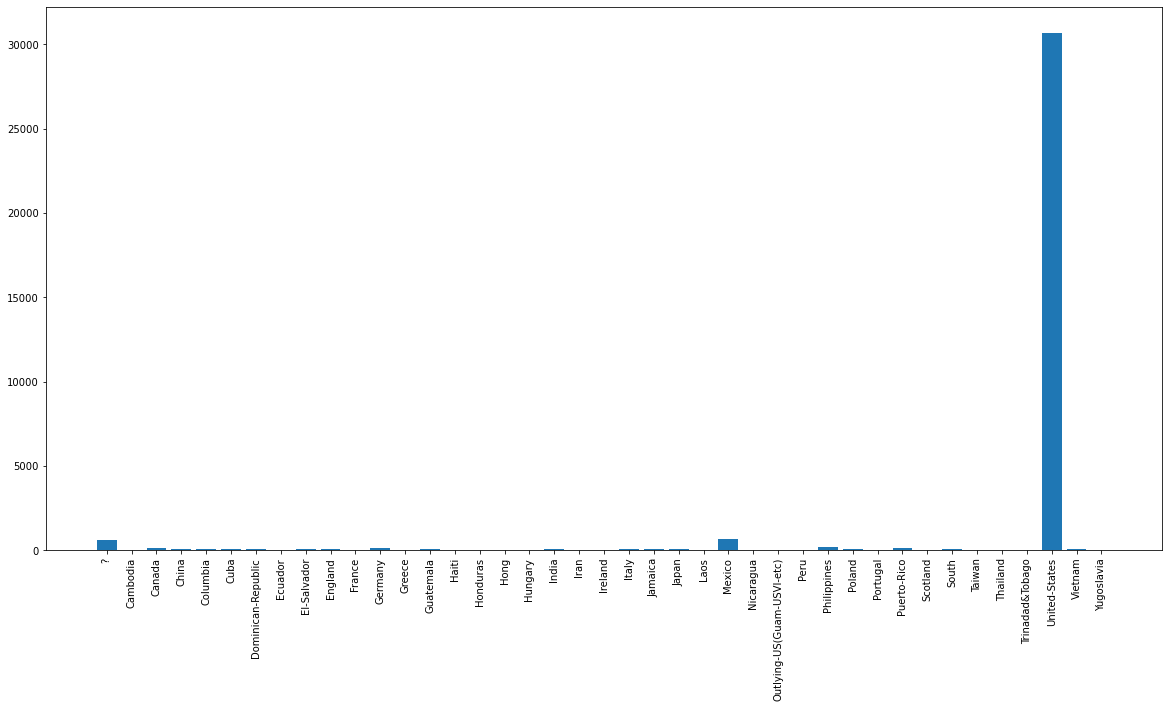

In [34]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90)
df = census_df.groupby(['native_country']).size().reset_index(name='counts')
plt.bar(x="native_country", height="counts", data=df);
plt.show()

Jako że przeważająca liczba osób ze zbioru pochodzi ze Stanów Zjednoczonych, dla efektywniejszego wyciągania wniosków lepiej będzie zbadać procentowy udział osób zarabiających na danym poziomie dla każdego z krajów, z którego pochodzą emigranci.

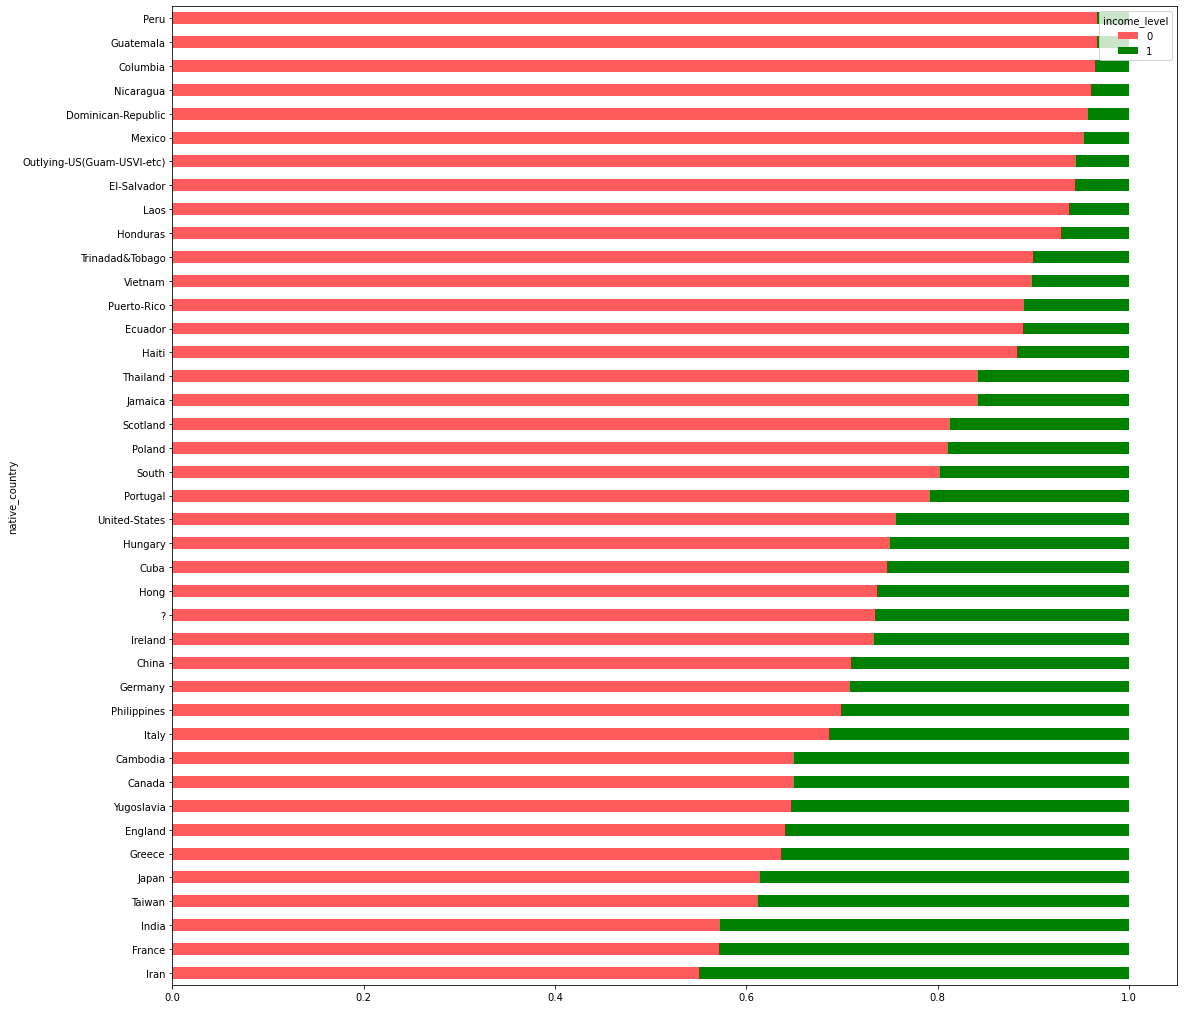

In [35]:
df = census_df.groupby('native_country')["income_level"].value_counts(normalize = True).unstack('income_level').sort_values(by = 1, ascending = False)
df.plot.barh(stacked=True, figsize = (18, 18), color = ['#ff5b5c', 'green'])
plt.show()

Widać, że wśród krajów, z których najmniejszy procent zarabia powyżej 50K to kraje Ameryki Środkowej. Po drugiej stronie przeważają z kolei kraje Europy i Azji. Można stwierdzić, że zależy to od rozwoju danych krajów. Jasne wydaje się, że dla osób pochodzących z tych bardziej rozwiniętych łatwiej jest o wyższe zarobki.

W celu zredukowania klas można by pogupować te dane w zależności od uzyskowanego dochodu, szczególnie że emigrantów jest stosunkowo mało, więc raczej nie wpłynęłoby to znacząco na dokładność predykcji, a mogłoby przyspieszyć ten proces. Spróbujmy więc zastosować taką redukcję:

In [36]:
census_df.groupby(['native_country']).size().reset_index(name='counts').sort_values(by = 'counts', ascending=False).head(10)

,native_country,counts
38,United-States,30693
25,Mexico,662
0,?,630
29,Philippines,199
11,Germany,151
32,Puerto-Rico,136
2,Canada,117
8,El-Salvador,106
18,India,103
5,Cuba,99


Widać, że jedyne bardziej wyróżniające się jednostki to *United-States* oraz *Mexico*. W takim razie wszystkie inne (w tym braki danych) możemy uznać jako *Others*. Uznaliśmy, że braki danych to najprawdopodobniej osoby z innych państw niż Stany Zjednoczone, gdyż raczej nie ma problemów z identyfikacją obywatela państwa, w kótrym został przeprowadzony spis. 

In [37]:
census_df.loc[(census_df.native_country != 'United-States') & (census_df.native_country != 'United-States'), 'native_country'] = "Other"

***Wykształcenie***

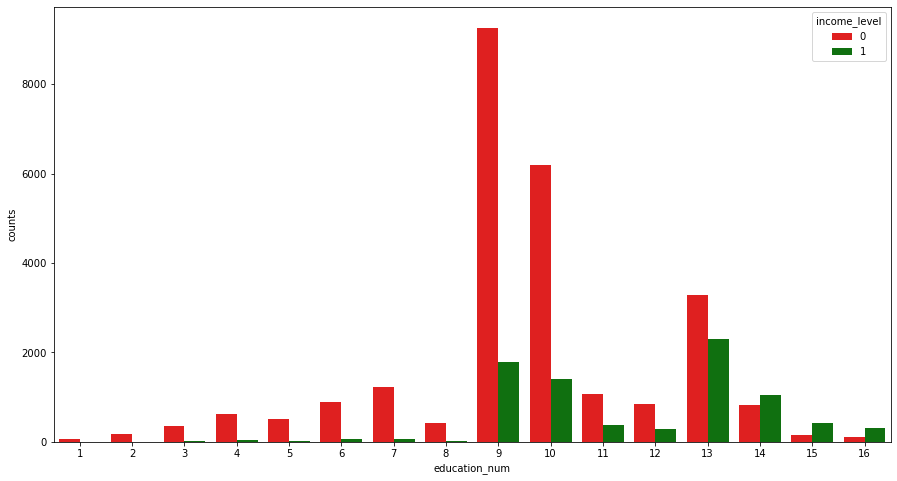

In [38]:
plt.figure(figsize=(15,8))
df = census_df.groupby(['education_num', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="education_num", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.show()

Możemy zaobserwować, że najwięcej osób z naszej próbki ma wykształcenie średnie (9 - HS-grad) lub uczęszczali na studia ale nie zdobyli stopnia naukowego (10 - some college). Dużo jest także osób ze stopniem licencjackim (13 - Bachelor). Widać wyrażnie, że im wyższy poziom w naukowej drabince, tym osób zarabiających powyżej 50K jest coraz więcej w stosunku do tych zarabiających mniej. Dla stopni powyżej magistra (od 14 - Masters) osoby oznaczone numerem 1 przeważają. 

***Stan cywilny***

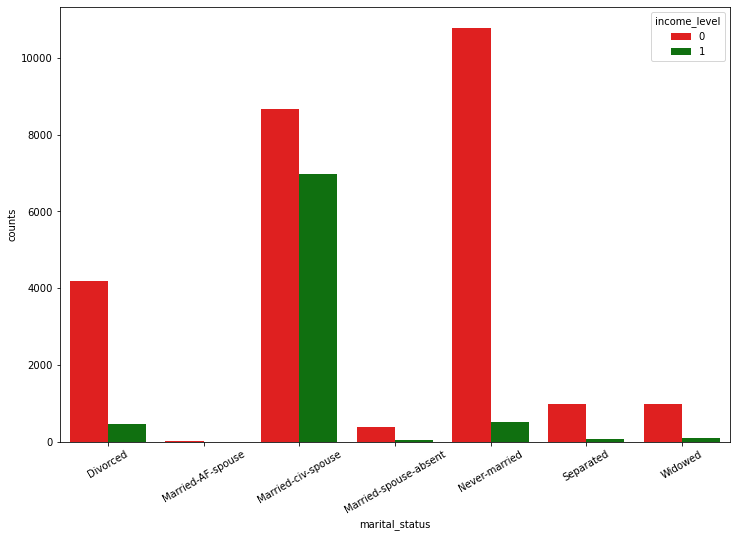

In [39]:
plt.figure(figsize=(12,8))
df = census_df.groupby(['marital_status', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="marital_status", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.xticks(rotation = 30)
plt.show()

Największe grupy osób są w związku z małżeńskim z osobą cwyilną, ewentualnie nigdy nie zawierały takiego związku lub są rozwiedzione. Pozostałe grupy są wyraźnie mniej liczne, a najmniejszą stanowią osoby w związku małzeńskim z osobą wojskową. W każdej grupie jest przewaga osób zarabiających mniej niż 50K. Jednak grupa małzeństw z osobami cywilnymi wyróżnia się najbardziej wyrównaną proporcją osób o różnym poziomie zarobków, podczas gdy wśród pozostałych zdecydowanie więcej osób nie zarabia więcej niz 50K. Może to nasuwać wniosek, że osoby w związku małżeńskim mają większą szansę na stabilność finansową, a co za tym idzie, lepsze zarobki w ogólności.

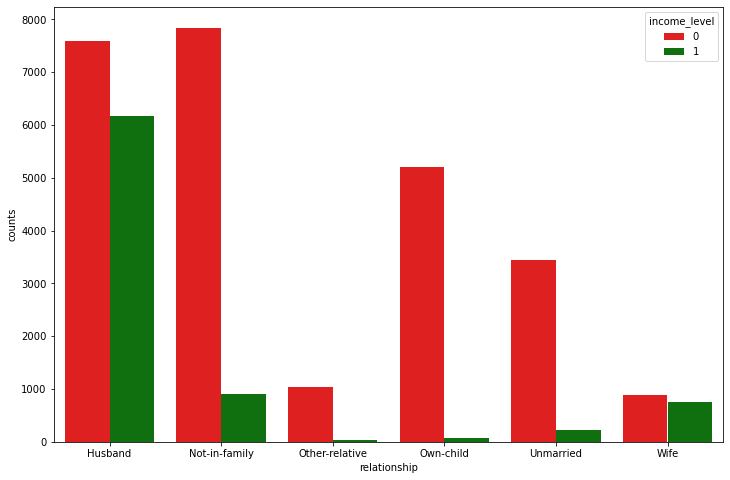

In [40]:
plt.figure(figsize=(12,8))
df = census_df.groupby(['relationship', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="relationship", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.show()

Dosyć podobną do poprzedniej zmiennej jest zmienna `relationship`. Wnioski się nakładają, bo ponownie widać, że proporcja osób o różnych poziomach zarobków jest wyrównana dla osób w związku małżeńskim. Dla pozostałych grup zdecydowanie przeważają osoby o mniejszych zarobkach. 

***Klasa robocza i zawód***

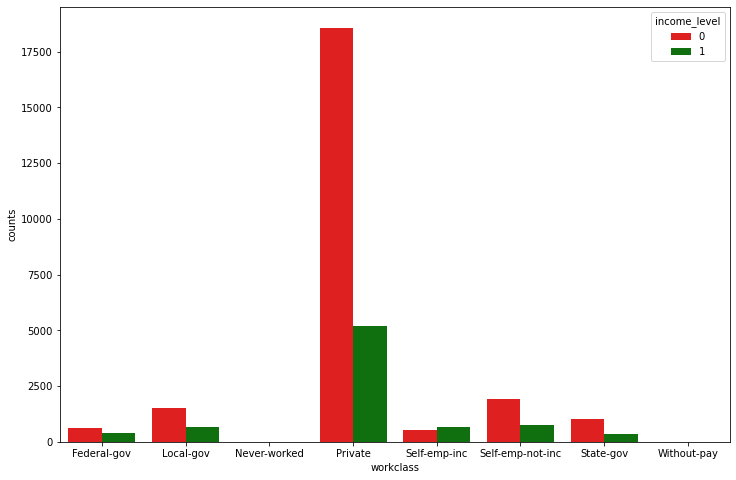

In [41]:
plt.figure(figsize=(12,8))
df = census_df[census_df.workclass != "?"].groupby(['workclass', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="workclass", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.show()

Przewazająca część osób z próbki to osoby pracujące w sektorze prywatnym. Mimo, że jest tam również najwięcej osób, które zarabiają powyżej 50K, to proporcjonalnie zdecydowanie więcej osób zarabia więcej w sektorze samozatrudniających się.  

Ze względu na duże zróznicowanie zawodów, najpierw przyjrzymy się jak dużo osób pracuje w poszczególnych dziedzinach.

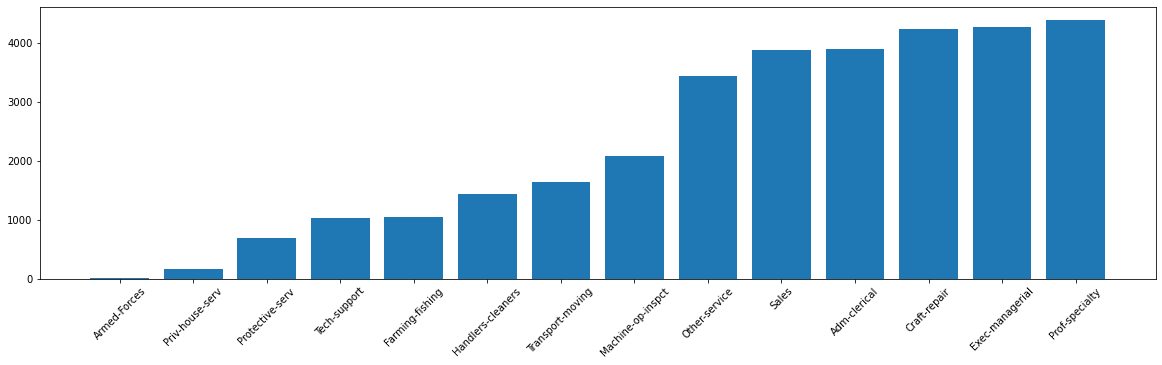

In [42]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation = 45)
df = census_df[census_df.occupation != "?"].groupby(['occupation']).size().reset_index(name='counts').sort_values(by = "counts")
plt.bar(x="occupation", height="counts", data=df);
plt.show()

Widać, że wśród osób z naszej ramki rozkład zawodów jest bardziej równowmierny. A teraz sprawdzimy jak duża część osób zarabai więcej niż 50K dla każdej grupy.

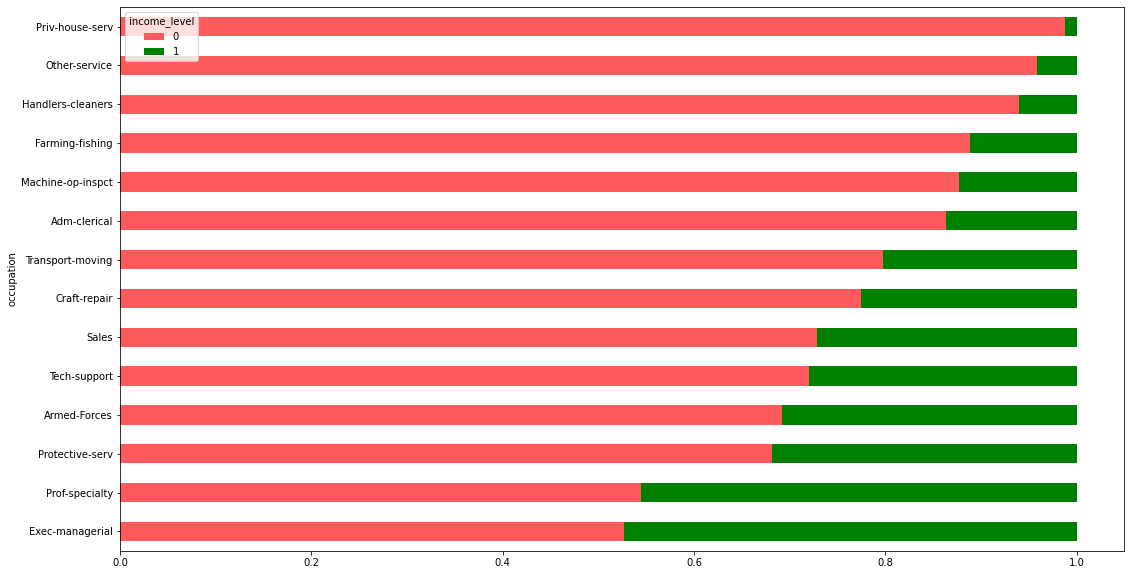

In [43]:
df = census_df[census_df.occupation != "?"].groupby('occupation')["income_level"].value_counts(normalize = True).unstack('income_level').sort_values(by = 1, ascending = False)
df.plot.barh(stacked=True, figsize = (18, 10), color = ['#ff5b5c', 'green'])
plt.show()

Dwie grupy o największym stosunku oznaczonych 1 do oznaczonych 0 to osoby o stanowiskach kierowniczych i osoby pracujące w specjalizacji. Są to także ogólnie najliczniejsze grupy pracujących, więc można uznać że praca w tych dwóch obszarach daje lepsze wynagrodzenie Nie można tego powiedzieć o osobach pracujących w zawodach odpowiedzialnych za sprzątanie i zajmowanie się domem, gdzie osób zarabaijących powyżej 50K jest bardzo mało.

***Płeć i rasa***

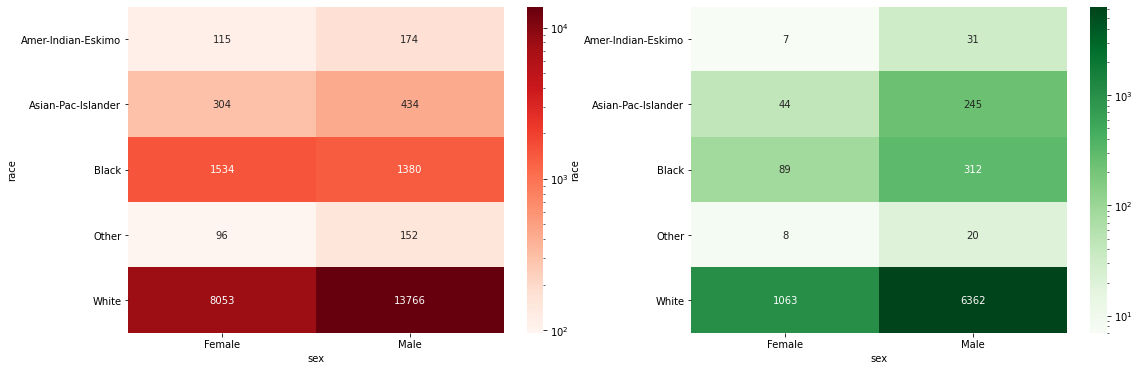

In [44]:
df1 = census_df[census_df.income_level == 0]
df1 = df1.groupby(['sex', 'race']).size().reset_index(name='counts')
df1 = pd.pivot(df1, index = 'race', columns = 'sex', values = 'counts')

df2 = census_df[census_df.income_level == 1]
df2 = df2.groupby(['sex', 'race']).size().reset_index(name='counts')
df2 = pd.pivot(df2, index = 'race', columns = 'sex', values = 'counts')

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(df1, annot=True, cmap='Reds', ax=ax1, fmt='g', norm=LogNorm())
sns.heatmap(df2, annot=True, cmap='Greens', ax=ax2, fmt='g', norm=LogNorm())
fig.set_size_inches(18.5, 6)
plt.show()

Dla lepszego zobrazowania ilości osób w poszczególnych grupach, używamy skali logarytmicznej. Wśród naszych obserwacji występuje więcej osób płci męskiej, a także przeważają osoby białe.

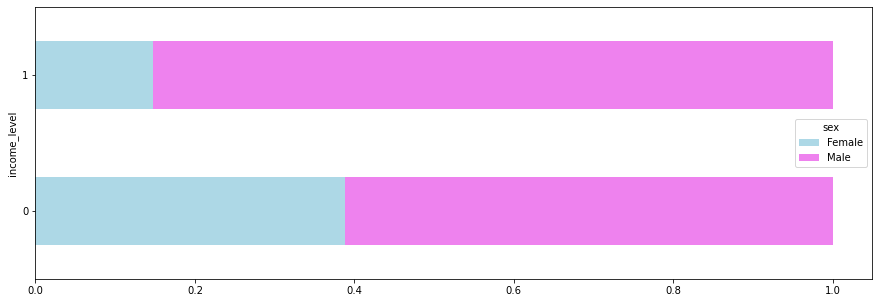

In [45]:
tmp2 = census_df
#tmp2['sex'] = tmp2['sex'].replace(['Famale','Male'],[1, 0])
tmp2 = tmp2[tmp2.race != "?"].groupby('income_level')["sex"].value_counts(normalize = True).unstack('sex')

tmp2.plot.barh(stacked=True, figsize = (15, 5), color = ['lightblue', 'violet'])
plt.show()

Można zauważyć, że w przypadku osób zarabiających poniżej 50K, stosunek kobiet do mężczyzn jest znacznie większy. Oznacza to, że kobiety częściej zarabiają mniejsze stawki. Dysproporcje można też dostrzec porównując grupy rasowe:

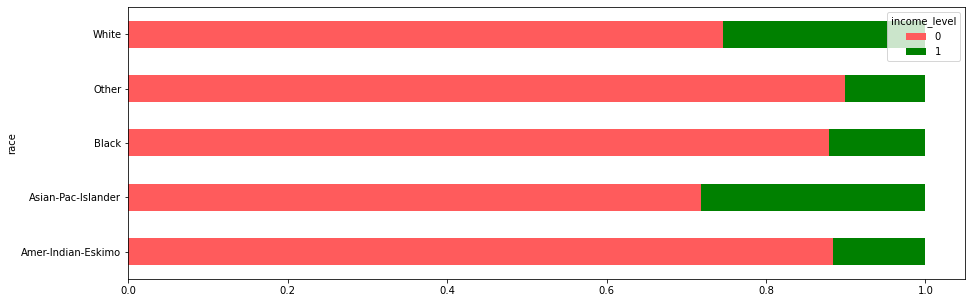

In [46]:
tmp = census_df
tmp = tmp[tmp.race != "?"].groupby('race')["income_level"].value_counts(normalize = True).unstack('income_level')

tmp.plot.barh(stacked=True, figsize = (15, 5), color = ['#ff5b5c', 'green'])
plt.show()

In [47]:
census_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
9276,8,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,0
25135,6,Private,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,4,1,United-States,1
4093,4,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,2,United-States,0
23421,10,?,6,Married-civ-spouse,?,Husband,White,Male,0,0,3,United-States,1
27463,1,Private,7,Never-married,Sales,Own-child,White,Female,0,0,1,United-States,0


Można zauważyć, że wśród osób Czarnoskórych oraz rdzennych Amerykanów i Inuitów występuje najmniejszy procent osób zarabiających powyżej 50K. Z kolei ludzie z Azji i wysp Pacyfiku oraz ludzie biali mają mniej drastyczną różnicę procentową i około 30% zarabia lepiej.  

### Zamiana zmiennych na numeryczne

In [48]:
country_df = pd.get_dummies(census_df['native_country'], prefix='country_')
country_df.shape

(34189, 2)

In [49]:
census_df.shape

(34189, 13)

In [50]:
# mają tyle samo wierszy więc łączenie obu ramek:
census_df = pd.concat([census_df, country_df], axis=1)
census_df.drop(['native_country'],  axis=1, inplace = True)

In [51]:
census_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_level,country__Other,country__United-States
9276,8,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,0,0,1
25135,6,Private,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,4,1,1,0,1
4093,4,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,2,0,0,1
23421,10,?,6,Married-civ-spouse,?,Husband,White,Male,0,0,3,1,0,1
27463,1,Private,7,Never-married,Sales,Own-child,White,Female,0,0,1,0,0,1


### Wykorzystanie *Weight of Value* i *Information Value*

# Całe to WOE robione na czuja, może niektóre źle podzieliłem, nie wiem

Teraz wyliczymy wartości WoE i IV dla poszczególnych zmiennych. Dzięki WoE możemy spróbować połączyć niektore wartości o podobnych wartościach tego parametru. Analizując IV możemy także dowiedzieć się, które zmienne są dobrymi predykatorami, jako że im większa suma IV, tym zmienna może okazać się lepszym predykatorem. Skorzystamy z poniższej napisanej przez nas funckji `woefun`.

In [52]:
total_neg = census_df['income_level'].value_counts()[0]
total_pos = census_df['income_level'].value_counts()[1]
def woefun(colname):
    df = census_df.groupby(['income_level', colname]).size().reset_index(name='counts')
    df = pd.pivot(df, index = colname, columns = 'income_level', values = 'counts')
    neg = df[0]/total_neg
    pos = df[1]/total_pos
    df['WoE'] = np.log(pos/neg)
    df['IV'] = (pos - neg)*df['WoE']
    return df

In [53]:
df = woefun('workclass')
df.sort_values('WoE')

income_level,0,1,WoE,IV
workclass,,,,
Without-pay,11.0,1.0,-1.241305,0.000373
?,1789.0,187.0,-1.101714,0.050600
Private,18582.0,5195.0,-0.117907,0.009369
State-gov,1026.0,372.0,0.142061,0.000855
Self-emp-not-inc,1923.0,755.0,0.221666,0.004067
Local-gov,1519.0,647.0,0.303129,0.006269
Federal-gov,623.0,380.0,0.662215,0.014896
Self-emp-inc,527.0,644.0,1.357088,0.079330
Never-worked,8.0,NaN,NaN,NaN


Widać po wartościach IV, że zmienna `workclass` będzie umiarkowanie wpływać na predykcyjność. Pogrupujemy wartości przyjmowane przez tę zmienną na kategorie według podobieństwa WoE. **Nie wiem co robić z NaN**

In [54]:
census_df['workclass'] = census_df['workclass'].replace(['Without-pay', 'Never-worked', '?'] , 0)
census_df['workclass'] = census_df['workclass'].replace(['Private'] , 1)
census_df['workclass'] = census_df['workclass'].replace(['Self-emp-not-inc', 'State-gov', 'Local-gov'] , 2)
census_df['workclass'] = census_df['workclass'].replace(['Federal-gov'] , 3)
census_df['workclass'] = census_df['workclass'].replace(['Self-emp-inc'] , 4)

In [55]:
df = woefun('occupation')
df.sort_values('WoE')

income_level,0,1,WoE,IV
occupation,,,,
Priv-house-serv,170,2,-3.286061,0.020676
Other-service,3301,141,-1.996631,0.219005
Handlers-cleaners,1352,87,-1.586842,0.065615
?,1797,187,-1.106175,0.051145
Farming-fishing,934,117,-0.920713,0.019897
Machine-op-inspct,1828,257,-0.805312,0.031304
Adm-clerical,3364,533,-0.685775,0.044023
Transport-moving,1311,332,-0.216821,0.002130
Craft-repair,3283,954,-0.079259,0.000762


Wydaje się, że podobnie zmienna `occupation` będzie miała wpływ na predykcję. Ją też podzielimy według otrzymanych WoE. 

In [56]:
census_df['occupation'] = census_df['occupation'].replace(['Priv-house-serv'] , 1)
census_df['occupation'] = census_df['occupation'].replace(['Other-service', 'Handlers-cleaners' ] , 2)
census_df['occupation'] = census_df['occupation'].replace(['?', 'Adm-clerical','Machine-op-inspct', 'Farming-fishing'] , 3)
census_df['occupation'] = census_df['occupation'].replace(['Transport-moving', 'Craft-repair'] , 4)
census_df['occupation'] = census_df['occupation'].replace(['Sales', 'Tech-support', 'Protective-serv', 'Armed-Forces'] , 5)
census_df['occupation'] = census_df['occupation'].replace(['Prof-specialty', 'Exec-managerial'] , 6)

In [57]:
df = woefun('relationship')
df.sort_values('WoE')

income_level,0,1,WoE,IV
relationship,,,,
Own-child,5209,77,-3.057748,0.583640
Other-relative,1040,33,-2.293879,0.082474
Unmarried,3449,221,-1.591087,0.168018
Not-in-family,7841,913,-0.993796,0.188706
Husband,7587,6176,0.950824,0.440424
Wife,882,761,1.009031,0.059642


Wydaje się, że wartośći IV są podejrzanie wysokie, być może zmienna `relationship` jest mocnym predykatorem. Dokonujemy analogicznego podziału.

In [58]:
census_df['relationship'] = census_df['relationship'].replace(['Own-child'] , 1)
census_df['relationship'] = census_df['relationship'].replace(['Other-relative'] , 2)
census_df['relationship'] = census_df['relationship'].replace(['Unmarried'] , 3)
census_df['relationship'] = census_df['relationship'].replace(['Not-in-family'] , 4)
census_df['relationship'] = census_df['relationship'].replace(['Wife', 'Husband'] , 5)

In [59]:
df = woefun('marital_status')
df.sort_values('WoE')

income_level,0,1,WoE,IV
marital_status,,,,
Never-married,10786,524,-1.867923,0.655020
Separated,994,71,-1.482468,0.043793
Widowed,978,96,-1.164572,0.030127
Married-spouse-absent,375,38,-1.132750,0.011071
Divorced,4190,476,-1.018448,0.104819
Married-AF-spouse,17,9,0.520601,0.000232
Married-civ-spouse,8668,6967,0.938136,0.486260


Analizując IV, możemy spodziewać się, że zmienna `marita_status` będzie silnym predykatorem. Mając na uwadzę wcześniejszą analizę i wartości WoE, podzielimy tę zmienną.

In [60]:
census_df['marital_status'] = census_df['marital_status'].replace(['Never-married', 'Separated'] , 1)
census_df['marital_status'] = census_df['marital_status'].replace(['Widowed', 'Married-spouse-absent', 'Divorced'] , 2)
census_df['marital_status'] = census_df['marital_status'].replace(['Married-AF-spouse', 'Married-civ-spouse'] , 3)

In [61]:
df = woefun('race')
df.sort_values('WoE')

income_level,0,1,WoE,IV
race,,,,
Other,248,28,-1.024634,0.006264
Amer-Indian-Eskimo,289,38,-0.872251,0.005641
Black,2914,401,-0.826731,0.052106
White,21819,7425,0.078661,0.005401
Asian-Pac-Islander,738,289,0.219073,0.001523


Patrząc na wartości IV, zmienna `race` może być słabym predykatorem. Patrząc na wartośći WoE oraz mając na uwadzę naszą wcześniejszą analizę zmiennej, wydaje się że można podzielić wartości na dwie kategorie.

In [62]:
census_df['race'] = census_df['race'].replace(['Other', 'Amer-Indian-Eskimo', 'Black'] , 1)
census_df['race'] = census_df['race'].replace(['White', 'Asian-Pac-Islander'] , 2)

In [63]:
df = woefun('education_num')
df.sort_values('WoE')

income_level,0,1,WoE,IV
education_num,,,,
1,57,1,-2.886461,0.005973
2,170,6,-2.187449,0.012694
7,1220,62,-1.822882,0.071694
3,345,20,-1.691222,0.018300
5,515,31,-1.653590,0.026478
6,896,55,-1.634017,0.045308
8,426,27,-1.602013,0.020953
4,628,42,-1.548281,0.029437
9,9260,1782,-0.491378,0.067919


Patrząc na ułożenie odpowiednich wartości zmiennej `education_num` po posegregowaniu według wartości WoE, można stwierdzić, że poziom edukacji ma znaczenie, co zauważyliśmy już wcześniej. Pogrupujmy zmienną. 

In [64]:
census_df['education_num'] = census_df['education_num'].replace([3,4,5,6,7,8] , 3)
census_df['education_num'] = census_df['education_num'].replace([9, 10] , 4)
census_df['education_num'] = census_df['education_num'].replace([11, 12] , 5)
census_df['education_num'] = census_df['education_num'].replace([13] , 6)
census_df['education_num'] = census_df['education_num'].replace([14] , 7)
census_df['education_num'] = census_df['education_num'].replace([15, 16] , 8)

In [65]:
df = woefun('age')
df.sort_values('WoE')

income_level,0,1,WoE,IV
age,,,,
1,4147,14,-4.534493,0.715269
2,3269,160,-1.860476,0.197461
3,2954,523,-0.574744,0.028537
4,2147,606,-0.108357,0.000919
10,2376,833,0.108450,0.001135
5,2583,1047,0.253567,0.007268
6,2287,1177,0.492318,0.027538
9,2284,1341,0.624077,0.047491
7,1962,1156,0.627591,0.041336


In [66]:
census_df['age'] = census_df['age'].replace([4, 10, 5] , 4)
census_df['age'] = census_df['age'].replace([6,7,8,9] , 5)

In [67]:
df = woefun('hours_per_week')
df.sort_values('WoE')

income_level,0,1,WoE,IV
hours_per_week,,,,
1,6598,607,-1.229403,0.220672
2,15091,4438,-0.067305,0.002542
3,4319,3136,0.836514,0.181743


Zmienna `hours_per_week` jest już dobrze przygotowana. 

In [68]:
df = woefun('capital_loss')
df.sort_values('WoE')

income_level,0,1,WoE,IV
capital_loss,,,,
1,251,71,-0.106183,0.000103
0,25216,7364,-0.074286,0.005156
2,273,217,0.927015,0.014858
5,154,157,1.175883,0.015603
4,102,167,1.649611,0.027204
3,12,205,3.994693,0.098256


In [69]:
census_df['capital_loss'] = census_df['capital_loss'].replace([0], 1)
census_df['capital_loss'] = census_df['capital_loss'].replace([2, 5], 2)
census_df['capital_loss'] = census_df['capital_loss'].replace([4], 3)
census_df['capital_loss'] = census_df['capital_loss'].replace([3], 4)

In [70]:
df = woefun('capital_gain')
df.sort_values('WoE')

income_level,0,1,WoE,IV
capital_gain,,,,
1,486,89,-0.540982,0.004224
2,475,95,-0.452848,0.003012
0,24961,6438,-0.198507,0.034302
3,71,696,3.439260,0.283207
5,5,264,5.123101,0.164337
4,10,599,5.249266,0.382325


In [71]:
census_df['capital_gain'] = census_df['capital_gain'].replace([2], 1)
census_df['capital_gain'] = census_df['capital_gain'].replace([0], 2)
census_df['capital_gain'] = census_df['capital_gain'].replace([4,5], 4)

In [72]:
df = woefun('sex')
df.sort_values('WoE')

income_level,0,1,WoE,IV
sex,,,,
Female,10102,1211,-0.964697,0.231906
Male,15906,6970,0.331509,0.079692


Zmienną dotyczącą płci też zmienimy na zmienną binarną.

In [73]:
census_df['sex'] = census_df['sex'].replace(['Female'], 0)
census_df['sex'] = census_df['sex'].replace(['Male'], 1)

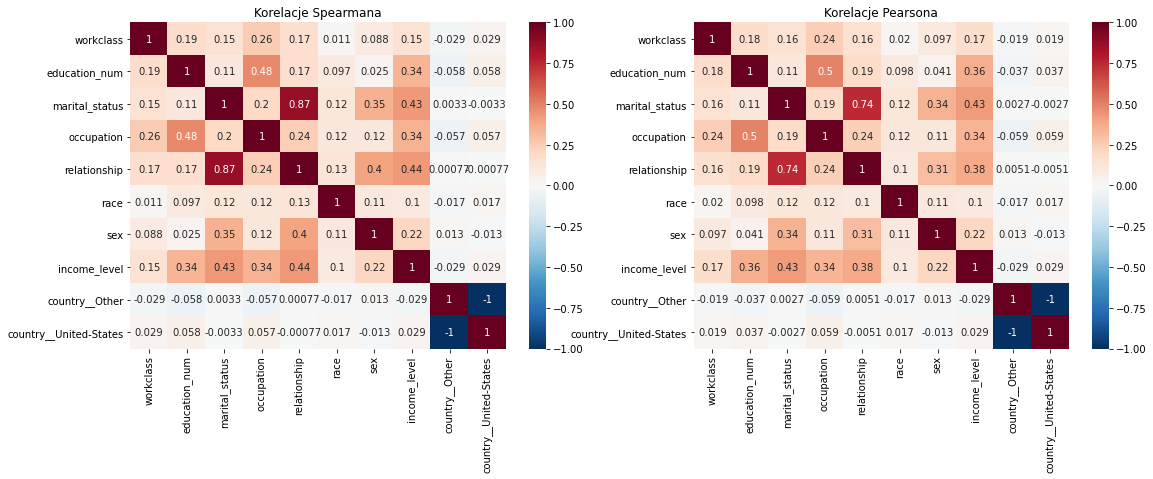

In [74]:
fig, (ax1, ax2) = plt.subplots(1,2)
heatmap = sns.heatmap(census_df.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax1)
heatmap = sns.heatmap(census_df.corr(method = 'pearson'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax2)
ax1.set_title("Korelacje Spearmana")
ax2.set_title("Korelacje Pearsona")
fig.set_size_inches(18.5, 6)
plt.show()

**Nie wiem co tu się wydarzyło w sumie :(( Nie ma żadnej ze starych zmiennych XD** 

Widać, że zmienne korelują ze zmienną celu na poziomie 0.1 - 0.44 dla korelacji Spearmana i prawie identycznym zakresie w przypadku korelacji Pearsona. Możemy także zauważyć, że zmienne, `relationship` i `marital_status` są od siebie wyraźnie zależne. Podobnie, korelację na poziomie -1 mają zmienne `country_Other` i `country_United_States`, co wynika z tego, że jest uprzednio zakodowana one-hot kolumna `country`.

Warto spojrzeć jeszcze na zmienne pod kątem ich siły predykcji zmiennej celu. Zbadamy wskaźnik gini.

In [75]:
import copy

In [76]:
kopia = copy.deepcopy(census_df)

In [77]:
census_df = copy.deepcopy(kopia)

In [78]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
def gini_roc(y_test, y_pred_proba, tytul):
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    
    plt.plot(fpr,tpr)
    plt.title(tytul)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    roc_auc = metrics.auc(fpr, tpr)
    gini = (2 * roc_auc) - 1

    return gini

def gini_train_val(model, X_train, y_train):
    
    y_pred_proba = model.predict_proba(X_train)[::,1]
    gini_train = gini_roc(y_train, y_pred_proba, "ROC Curve for Training Sample")
    print("gini_test: %.4f" % gini_train)

    return

In [80]:
woefun('relationship')['IV'].sum()

1.5227124591036618

In [81]:
woefun('marital_status')['IV'].sum()

1.3272607834972492

In [82]:
y_train = census_df['income_level']
census_df.drop('income_level', inplace = True, axis = 1)

In [83]:
lr = LogisticRegression(max_iter=1000)

In [84]:
lr.fit(census_df[['marital_status']], y_train)

LogisticRegression(max_iter=1000)

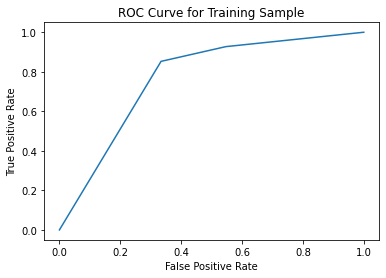

gini_test: 0.5370


In [85]:
gini_train_val(lr, census_df[['marital_status']], y_train)

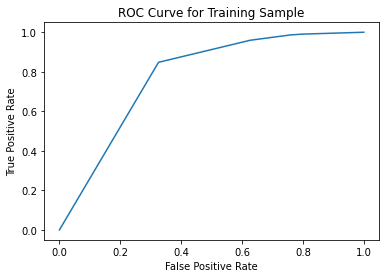

gini_test: 0.5569


In [86]:
lr.fit(census_df[['relationship']], y_train)
gini_train_val(lr, census_df[['relationship']], y_train)

Po zbadaniu gini wyłącznie dla `marital_status` i `relationship` dla regresji logistycznej, możemy stwierdzić, że uzyskany score jest lepszy dla tej drugiej zmiennej. Podobnie wnioski można wyciągnąć ze zbadania Information value, gdyż także ta wartość jest wyższa dla zmiennej `relationship`. Jako, że obie wysoko korelują ze sobą, można usunąć zmienną `marital_status`. **sens???**  

In [87]:
# # Przetworzenie zbioru testowego
# census_df_test.drop("fnlwgt", axis=1, inplace=True)
# census_df_test.drop("education", axis=1, inplace=True)
# census_df_test['income_level'] = census_df_test['income_level'].replace(['<=50K','>50K'],[0, 1])
# census_df_test['age'] = pd.qcut(census_df_test['age'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# census_df_test['hours_per_week'] = pd.cut(census_df_test['hours_per_week'], bins=[0, 35, 45, np.inf], labels=[1, 2, 3])
# census_df_test['capital_gain'] = pd.cut(census_df_test['capital_gain'], bins=[-1, 114.0, 3103.0, 5013.0, 7688.0, 15024.0, np.inf], 
#              labels=[0, 1, 2, 3, 4, 5])
# census_df_test['capital_loss'] = pd.cut(census_df_test['capital_loss'], bins=[-1, 155.0, 1619.2, 1887.0, 1902.0, 2002.0, np.inf], 
#              labels=[0, 1, 2, 3, 4, 5])

# census_df_test.loc[(census_df_test.native_country != 'United-States') & (census_df_test.native_country != 'United-States'), 'native_country'] = "Other"

# country_df_test = pd.get_dummies(census_df_test['native_country'], prefix='country_')
# census_df_test = pd.concat([census_df_test, country_df_test], axis=1)
# census_df_test.drop(['native_country'],  axis=1, inplace = True)

In [88]:
# def WoETransform(census_df):
#     census_df['workclass'] = census_df['workclass'].replace(['Without-pay', 'Never-worked', '?'] , 0)
#     census_df['workclass'] = census_df['workclass'].replace(['Private'] , 1)
#     census_df['workclass'] = census_df['workclass'].replace(['Self-emp-not-inc', 'State-gov', 'Local-gov'] , 2)
#     census_df['workclass'] = census_df['workclass'].replace(['Federal-gov'] , 3)
#     census_df['workclass'] = census_df['workclass'].replace(['Self-emp-inc'] , 4)

#     census_df['occupation'] = census_df['occupation'].replace(['Priv-house-serv'] , 1)
#     census_df['occupation'] = census_df['occupation'].replace(['Other-service', 'Handlers-cleaners' ] , 2)
#     census_df['occupation'] = census_df['occupation'].replace(['?', 'Adm-clerical','Machine-op-inspct', 'Farming-fishing'] , 3)
#     census_df['occupation'] = census_df['occupation'].replace(['Transport-moving', 'Craft-repair'] , 4)
#     census_df['occupation'] = census_df['occupation'].replace(['Sales', 'Tech-support', 'Protective-serv', 'Armed-Forces'] , 5)
#     census_df['occupation'] = census_df['occupation'].replace(['Prof-specialty', 'Exec-managerial'] , 6)

#     census_df['relationship'] = census_df['relationship'].replace(['Own-child'] , 1)
#     census_df['relationship'] = census_df['relationship'].replace(['Other-relative'] , 2)
#     census_df['relationship'] = census_df['relationship'].replace(['Unmarried'] , 3)
#     census_df['relationship'] = census_df['relationship'].replace(['Not-in-family'] , 4)
#     census_df['relationship'] = census_df['relationship'].replace(['Wife', 'Husband'] , 5)
    
#     census_df['marital_status'] = census_df['marital_status'].replace(['Never-married', 'Separated'] , 1)
#     census_df['marital_status'] = census_df['marital_status'].replace(['Widowed', 'Married-spouse-absent', 'Divorced'] , 2)
#     census_df['marital_status'] = census_df['marital_status'].replace(['Married-AF-spouse', 'Married-civ-spouse'] , 3)
    
#     census_df['race'] = census_df['race'].replace(['Other', 'Amer-Indian-Eskimo', 'Black'] , 1)
#     census_df['race'] = census_df['race'].replace(['White', 'Asian-Pac-Islander'] , 2)
    
#     census_df['education_num'] = census_df['education_num'].replace([3,4,5,6,7,8] , 3)
#     census_df['education_num'] = census_df['education_num'].replace([9, 10] , 4)
#     census_df['education_num'] = census_df['education_num'].replace([11, 12] , 5)
#     census_df['education_num'] = census_df['education_num'].replace([13] , 6)
#     census_df['education_num'] = census_df['education_num'].replace([14] , 7)
#     census_df['education_num'] = census_df['education_num'].replace([15, 16] , 8)
    
#     census_df['age'] = census_df['age'].replace([4, 10, 5] , 4)
#     census_df['age'] = census_df['age'].replace([6,7,8,9] , 5)
    
#     census_df['capital_loss'] = census_df['capital_loss'].replace([0], 1)
#     census_df['capital_loss'] = census_df['capital_loss'].replace([2, 5], 2)
#     census_df['capital_loss'] = census_df['capital_loss'].replace([4], 3)
#     census_df['capital_loss'] = census_df['capital_loss'].replace([3], 4)

#     census_df['capital_gain'] = census_df['capital_gain'].replace([2], 1)
#     census_df['capital_gain'] = census_df['capital_gain'].replace([0], 2)
#     census_df['capital_gain'] = census_df['capital_gain'].replace([4,5], 4)

#     census_df['sex'] = census_df['sex'].replace(['Female'], 0)
#     census_df['sex'] = census_df['sex'].replace(['Male'], 1)
    
#     return census_df


In [89]:
# census_df_test = WoETransform(census_df_test)

In [90]:
y_test = census_df_test['income_level']
census_df_test.drop('income_level', inplace = True, axis = 1)

### Podsumowanie preprocessingu

Dzięki eksploracji danych pod kątem dalszej predykcyjności zmiennej określającej, czy ktoś zarabia mniej czy więcej niż 50 000$ rocznie doszliśmy do następujących wniosków:
* kolumna `fnlwgt` nie wnosi żadnej wartości pod tym kątem, dlatego została usunięta
* kolumny `education` i `education_num` określają dokładnie te same informacje, tylko przekazane w inny sposób. Kolumna, której będziemy używać to `education_num`, ponieważ z danymi numerycznymi, które określają hierarię zmiennej łatwiej się pracuje. Druga została usunięta, ponieważ nie będzie używana w predykcji. Mamy jednak w pamięci oznaczania, których dostarcza.
Zmienna ta pokazuje, że im wyższy poziom edukacji, tym osób zarabiających powyżej 50K jest coraz więcej w stosunku do tych zarabiających mniej. 
* kolumna `age` ujawnia tendencję, że osoby o wyższym przychodzie są starsze, najwięcej w okolicach 45 lat, natomiast wśród drugiej grupy dominują osoby mlode, około 20-letnie. Zmienna ta została podzielona na zmienną kategoryczną o 10 kategoriach, oznaczających decyle
* z kolumny `hours_per_week` wynika, że osoby które pracują więcej, zarabiają lepiej, ponieważ znaczna większość osob o wyższych dochodach pracuje więcej niż 35 godin tygodniowo. Ta zmienna również została zamieniona na kategoryczną o 3 kategoriach
* kolumna `capital_gain` wnosi informację, że wsród osób, które osiągają zysk kapitałowy na poziomie 10000\\$-20000\\$` jest znacznie więcej osób dochodzie większym niż 50000\\$, natpiast osoby o dochodzie rocznym mniejszym od tej wartości nie przekraczają zysku kapitałowego o wartości 50000\\$. Zmienna ta została przekształcona na kategoryczną, grupując zerowe wartości jako jedną kategorię, a pozostałe po kwintylach. 
* kolumna `capital_loss` wydaje się, że niezbyt wpływa na dochód roczny, ponieważ rozkłady dla obu grup osób są zbliżone.  Zmienna ta została przekształcona na kategoryczną, grupując zerowe wartości jako jedną kategorię, a pozostałe po kwintylach. 
* kolumna `native_country` dostarcza informacji, że więkość osób stanowią osoby pochodzące ze Stanów Zjednoczonych. Jedyną wybijającą się grupą poza nimi są obywatele Meksyku. Pozostali stanowią niewielką część, dlatego zostali zgrupowani do kategorii *Others*. Do tej kategorii zostały również zaliczone braki danych. Widać było jednak wsród nich zależność, że osoby z bardziej rozwiniętych państw zarabiają więcej.
* kolumna `marital_status` wskazuje, że dla każdej z podgrup osób zarabiających mniej jest więcej, jednak różnica ta jest najmniejsza w przypadku osób w związkach małżeńskich
* z kolumny `relationship` wynikają podobne informacje jak z `marital_status`. Tu również proporcja osób o różnych poziomach zarobków jest wyrównana dla osób w związku małżeńskim, a dla innych grup występuje znacząca przewaga osób o mniejszych dochodach. W przyszłości można sprawdzić, czy predykcyjność mocno się zmieni po usunięci jednej z nich oraz sprawdzić którą lepiej usunąć.
* z kolumny `workclass` dowiadujemy się, że jedyną grupą, dla której przeważają osoby o wyższych dochodach to grupa osób, które posiadają własną firmę
* kolumna `occupation` dostarcza informacji, że największy współczynnik osób zarabiającyh lepiej do tych zarabiajaącyh gorzej odnotowany jest wśród osób na stanowiskach kierowniczych i pracujących w specjalizacji. Najmniejszy jest natomiast dla osób pracujących w zawodach odpowiedzialnych za sprzątanie i zajmowanie się domem, gdzie osób zarabaijących powyżej 50K jest bardzo mało.
* z kolumn `sex` i `race` można odczytać, że kobiety rzadziej zarabiają powyżej 50 000\\$ Jeśli chodzi o rasy to większy odsetek lepiej zarabijących jest wśród ludności białej oraz z Azji i wysp Pacyfiku.

# Modele 

Skonstruujemy teraz kilka modeli predykcyjnych. Jako, że w naszym zbiorze występują kontrowersyjne kolumny `sex` oraz `race`, zbudujemy modele zarówno na danych ze wszystkimi zmiennymi, a także po wykluczeniu tych dwóch konkretnych. 

In [91]:
census_dfv2 = census_df.drop('sex', axis = 1)
census_dfv2 = census_dfv2.drop('race', axis = 1)

census_df_testv2 = census_df_test.drop('sex', axis = 1)
census_df_testv2 = census_df_testv2.drop('race', axis = 1)

#### Regresja Logistyczna

Na początek wykorzystamy regresję logistyczną. Wykorzystamy już wcześniej zdefiniowany model `lr`.

In [92]:
lr.fit(census_df, y_train)
res = lr.predict(census_df)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [93]:
accuracy_score(y_train, res)

0.85387112814063

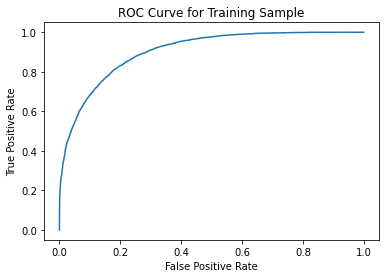

gini_test: 0.8059


In [94]:
gini_train_val(lr, census_df, y_train)

Zarówno acuracy score jak i wskaźnik gini dla podstawowego zbioru testowego są na wysokim poziomie. Teraz sprawdźmy predykcyjność dla zbioru pozbawionego zmiennych `sex` i `race`

In [95]:
lr.fit(census_dfv2, y_train)
res = lr.predict(census_dfv2)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [96]:
accuracy_score(y_train, res)

0.8536078855772324

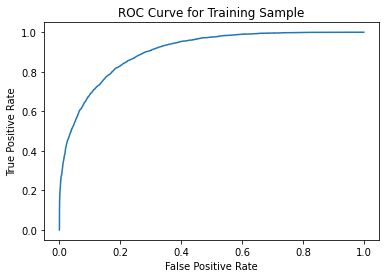

gini_test: 0.8053


In [97]:
gini_train_val(lr, census_dfv2, y_train)

Wyniki różnią się nieznacznie od tych dla całego zbioru. Sprawdźmy jak wynik będzie wyglądał dla zbioru testowego`

In [98]:
# lr.fit(census_df_test, y_test)
# res = lr.predict(census_df_test)
# res

In [99]:
# accuracy_score(y_test, res)

In [100]:
# gini_train_val(lr, census_df_test, y_test)

In [101]:
# lr.fit(census_df_testv2, y_test)
# res = lr.predict(census_df_testv2)
# res

In [102]:
# accuracy_score(y_test, res)

In [103]:
# gini_train_val(lr, census_df_testv2, y_test)

Na zbiorze testowym jest podobnie **(Sheeeeesh, to chyba niedobrze)** Nadal się zastanawiam czy testowy też wgl powinien być przetwarzany...

#### Drzewo decyzyjne

In [104]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier()
Tree.fit(census_df, y_train)
res = Tree.predict(census_df)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [105]:
accuracy_score(y_train, res)

0.8905788411477376

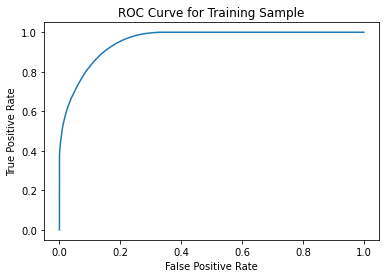

gini_test: 0.9123


In [106]:
gini_train_val(Tree, census_df, y_train)

OKURDE chyba jest przetrenowany, za dobrzy w to jesteśmy xD

In [107]:
Tree.fit(census_dfv2, y_train)
res = Tree.predict(census_dfv2)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [108]:
accuracy_score(y_train, res)

0.880838866302027

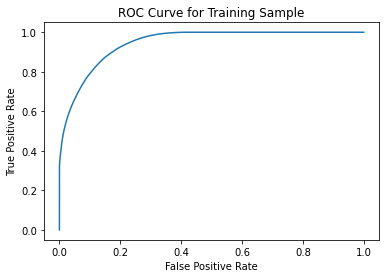

gini_test: 0.8916


In [109]:
gini_train_val(Tree, census_dfv2, y_train)

In [110]:
#Próba zabawy hiperparametrami 
#Oczywiście nieudana ;)

Tree = DecisionTreeClassifier(criterion = 'entropy',
                            random_state = 123,
                            max_features = 'auto',
                            max_depth = 12,
                            splitter = 'random')
Tree.fit(census_df, y_train)
res = Tree.predict(census_df)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [111]:
accuracy_score(y_train, res)

0.8512679516803651

#### Las losowy

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(census_df, y_train)
res = rf.predict(census_df)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [113]:
accuracy_score(y_train, res)

0.8905788411477376

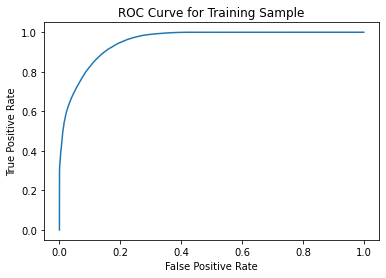

gini_test: 0.9076


In [114]:
gini_train_val(rf, census_df, y_train)

In [115]:
rf.fit(census_dfv2, y_train)
res = rf.predict(census_dfv2)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [116]:
accuracy_score(y_train, res)

0.8808096171283162

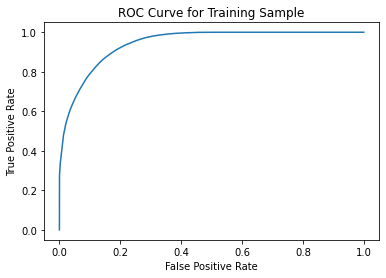

gini_test: 0.8879


In [117]:
gini_train_val(rf, census_dfv2, y_train)

#### AdaBoost

In [118]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(census_df, y_train)
res = abc.predict(census_df)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [119]:
accuracy_score(y_train, res)

0.8548656000467987

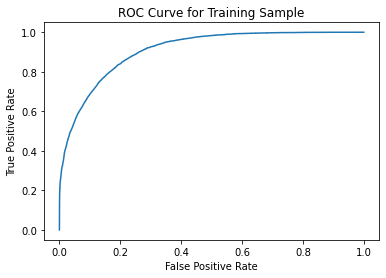

gini_test: 0.8174


In [120]:
gini_train_val(abc, census_df, y_train)

In [121]:
abc.fit(census_dfv2, y_train)
res = abc.predict(census_dfv2)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [122]:
accuracy_score(y_train, res)

0.8551580917839071

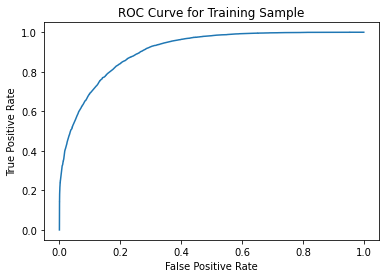

gini_test: 0.8171


In [123]:
gini_train_val(abc, census_dfv2, y_train)

#### Gradient Boosting

In [124]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(census_df, y_train)
res = gb.predict(census_df)
res

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [125]:
accuracy_score(y_train, res)

0.8600427037936178

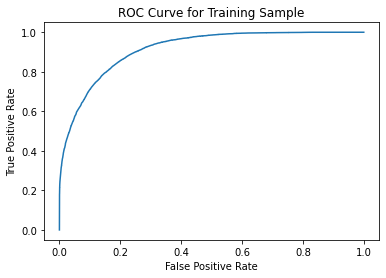

gini_test: 0.8299


In [126]:
gini_train_val(gb, census_df, y_train)